**Q1: Import data and check for null values, column info, and descriptive statistics**

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('transaction_anomalies_dataset.csv')

# Check for null values
null_values = data.isnull().sum()

# Get column info
column_info = data.info()

# Get descriptive statistics
descriptive_stats = data.describe()
print("#################################")
print("Null Values: ", null_values)
print("#################################")
print("Column Info: ", column_info)
print("#################################")
print("Description: ",descriptive_stats)
print("#################################")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
###################

**Q2: Check the distribution of transaction amounts in the data**

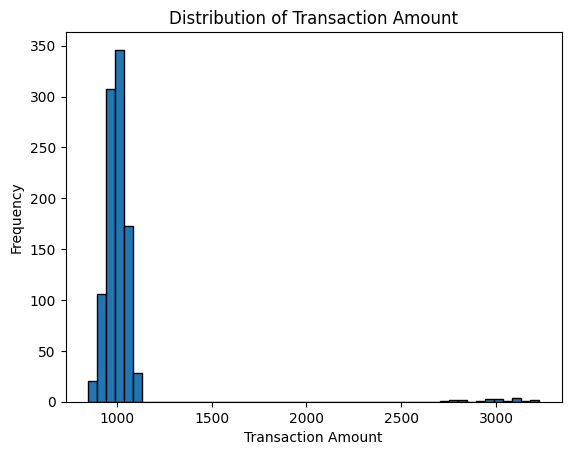

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of Transaction Amount
plt.hist(data['Transaction_Amount'], bins=50, edgecolor='k')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


**Q3: Check the distribution of transaction amounts by account type**

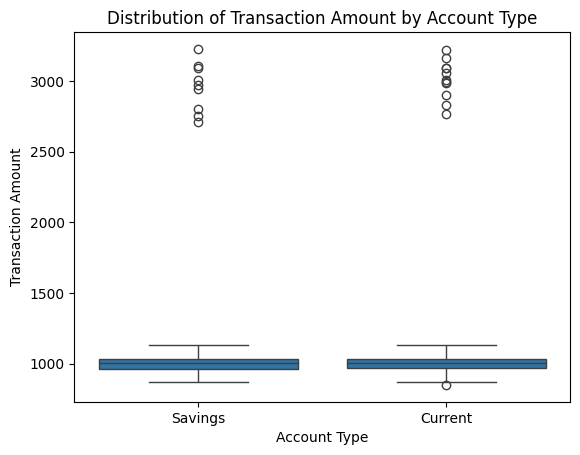

In [5]:
import seaborn as sns

# Plot the distribution of Transaction Amount by Account Type
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data)
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amount by Account Type')
plt.show()


**Q4: Check the average transaction amount by age**

In [6]:
import plotly.express as px

# Plot the scatter plot using Plotly
fig = px.scatter(data, x='Age', y='Transaction_Amount', color='Account_Type',
                 title='Average Transaction Amount vs. Age',
                 labels={'Transaction_Amount': 'Average_Transaction_Amount'},
                 trendline='ols')

# Update layout to match the required y-axis scaling and range
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Average_Transaction_Amount',
    yaxis=dict(
        tick0=960,      # Start the ticks from 960
        dtick=20,       # Interval of 20 units between ticks to better match the scatter plot distribution
        range=[960, 1080]  # Set the range of the y-axis
    )
)

fig.show()

**Q5: Check the count of transactions by day of the week**

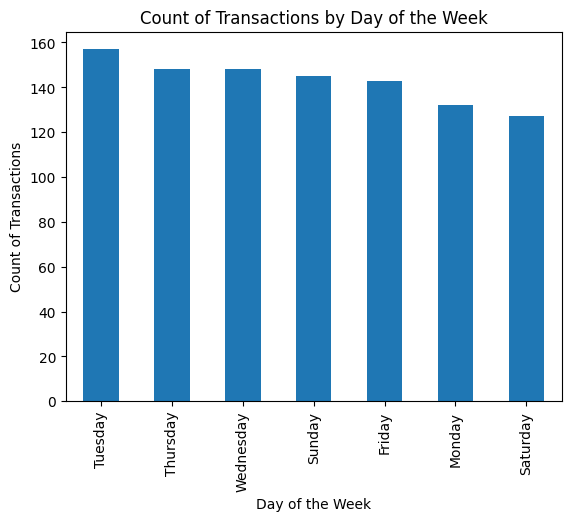

In [7]:
transactions_by_day = data['Day_of_Week'].value_counts()

transactions_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by Day of the Week')
plt.show()


**Q6: Check the correlation between all the columns in the data**

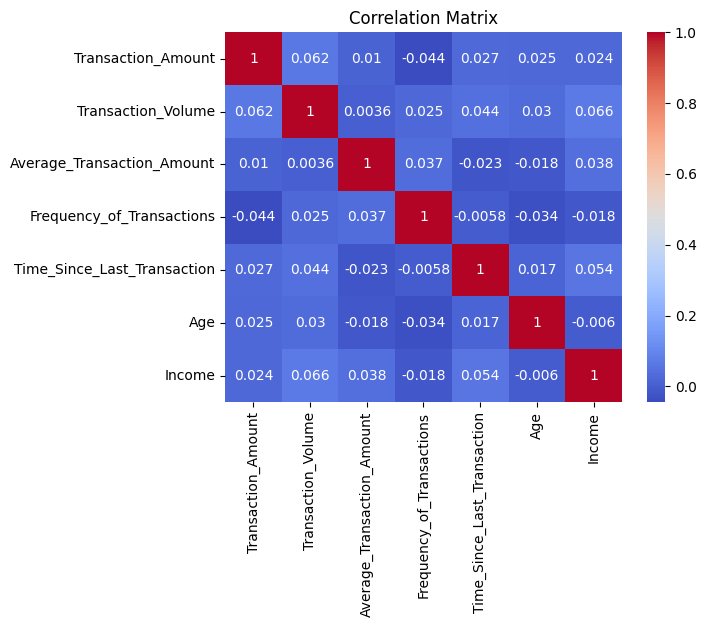

In [8]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Q7: Visualize anomalies in the data.**

In [9]:
import plotly.express as px
from sklearn.ensemble import IsolationForest

# Select relevant features
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
data['anomaly'] = model.fit_predict(data[features])

# Map anomaly values to False and True for normal and anomalous points
data['anomaly'] = data['anomaly'].map({1: False, -1: True})

# Visualize the anomalies
fig = px.scatter(data, x='Age', y='Transaction_Amount', color='anomaly',
                 title='Anomalies in Transaction Amount vs. Age',
                 labels={'anomaly': 'Anomaly', 'Transaction_Amount': 'Transaction Amount'},
                 color_discrete_map={False: 'blue', True: 'red'})

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Transaction Amount',
    yaxis=dict(
        tick0=960,      # Start the ticks from 960
        dtick=20,       # Interval of 20 units between ticks
        range=[960, 1080]  # Set the range of the y-axis
    )
)

fig.show()

**Q8: Calculate the number of anomalies in the data to find the ratio of anomalies**

In [10]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = data[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                 'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']]

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)
data['anomaly'] = isolation_forest.fit_predict(features)

# Calculate the number of anomalies
num_anomalies = sum(data['anomaly'] == -1)
total_transactions = len(data)
anomaly_ratio = num_anomalies / total_transactions

num_anomalies, anomaly_ratio

(100, 0.1)

**Q9: Fit the model and get predictions in binary values**

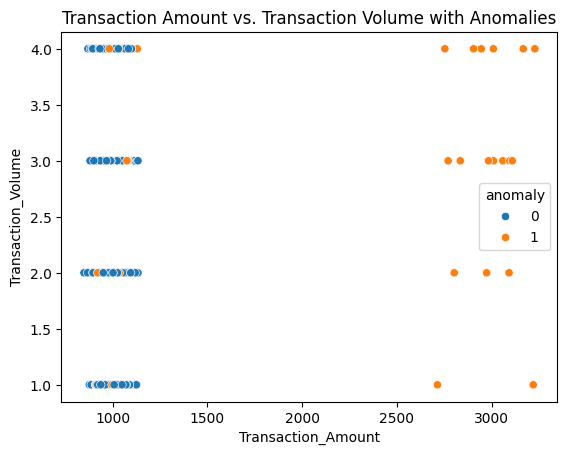

In [11]:
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualize the anomalies
sns.scatterplot(x='Transaction_Amount', y='Transaction_Volume', hue='anomaly', data=data)
plt.title('Transaction Amount vs. Transaction Volume with Anomalies')
plt.show()


**Q10: Show the classification report**

In [12]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report
# Define the true labels based on the current 'anomaly' column
data['true_labels'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Extract the true labels and predictions
true_labels = data['true_labels']
predictions = data['anomaly']

# Generate classification report as a dictionary
report_dict = classification_report(true_labels, predictions, output_dict=True)

# Convert the classification report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round the values to 2 decimal places
report_df = report_df.round(2)

# Extract and format the required output
formatted_report = report_df.loc[['0', '1', 'accuracy', 'macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score', 'support']]

# Renaming the index to match the output
formatted_report.index = ['Normal', 'Anomaly', 'accuracy', 'macro avg', 'weighted avg']

# Print the formatted report
print(formatted_report.to_string())


              precision  recall  f1-score  support
Normal              1.0    0.90      0.95   1000.0
Anomaly             0.0    0.00      0.00      0.0
accuracy            0.9    0.90      0.90      0.9
macro avg           0.5    0.45      0.47   1000.0
weighted avg        1.0    0.90      0.95   1000.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**Q11: Use the trained model to detect anomalies and bring the following results**

In [16]:
# Select relevant features for anomaly detection
features = data[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                 'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']]

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)
isolation_forest.fit(features)

# Get user input
transaction_amount = float(input("Enter the value for 'Transaction_Amount': "))
average_transaction_amount = float(input("Enter the value for 'Average_Transaction_Amount': "))
frequency_of_transactions = float(input("Enter the value for 'Frequency_of_Transactions': "))
time_since_last_transaction = float(input("Enter the value for 'Time_Since_Last_Transaction': "))
age = float(input("Enter the value for 'Age': "))
income = float(input("Enter the value for 'Income': "))

# Create a DataFrame with the input values
input_data = pd.DataFrame({
    'Transaction_Amount': [transaction_amount],
    'Transaction_Volume': [0],  # Assuming a placeholder value as it's not provided in the input
    'Average_Transaction_Amount': [average_transaction_amount],
    'Frequency_of_Transactions': [frequency_of_transactions],
    'Time_Since_Last_Transaction': [time_since_last_transaction],
    'Age': [age],
    'Income': [income]
})

# Predict if the transaction is an anomaly
prediction = isolation_forest.predict(input_data)
is_anomaly = prediction[0] == -1

# Output the result in the specified format
print(f"Enter the value for 'Transaction_Amount': {transaction_amount}")
print(f"Enter the value for 'Average_Transaction_Amount': {average_transaction_amount}")
print(f"Enter the value for 'Frequency_of_Transactions': {frequency_of_transactions}")

if is_anomaly:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is not flagged as an anomaly.")

Enter the value for 'Transaction_Amount': 10000
Enter the value for 'Average_Transaction_Amount': 900
Enter the value for 'Frequency_of_Transactions': 6
Enter the value for 'Time_Since_Last_Transaction': 5
Enter the value for 'Age': 35
Enter the value for 'Income': 550000
Enter the value for 'Transaction_Amount': 10000.0
Enter the value for 'Average_Transaction_Amount': 900.0
Enter the value for 'Frequency_of_Transactions': 6.0
Anomaly detected: This transaction is flagged as an anomaly.
